# Pymaceuticals Inc.
---

### Analysis

- Add your analysis here.
 

In [1]:
%matplotlib notebook


# Dependencies and Setup

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import scipy.stats as st

%matplotlib inline

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single DataFrame
combined_data = pd.merge(mouse_metadata, study_results, on="Mouse ID")



# Display the data table for preview
combined_data.head()



,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [2]:
# Checking the number of mice.
mice_data = combined_data["Mouse ID"].unique()
number_of_mice = len(mice_data)
number_of_mice



249

In [3]:
# Our data should be uniquely identified by Mouse ID and Timepoint
# Get the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 

mice_dupli = combined_data[combined_data[["Mouse ID", "Timepoint"]].duplicated() == True]
mice_dupli_id = mice_dupli["Mouse ID"].unique()
mice_dupli_id



array(['g989'], dtype=object)

In [4]:
# Optional: Get all the data for the duplicate mouse ID. 
combined_data.loc[combined_data["Mouse ID"] ==str(mice_dupli.iloc[0,0]),:]

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
908,g989,Propriva,Female,21,26,0,45.000000,0
909,g989,Propriva,Female,21,26,0,45.000000,0
910,g989,Propriva,Female,21,26,5,48.786801,0
911,g989,Propriva,Female,21,26,5,47.570392,0
912,g989,Propriva,Female,21,26,10,51.745156,0
913,g989,Propriva,Female,21,26,10,49.880528,0
914,g989,Propriva,Female,21,26,15,51.325852,1
915,g989,Propriva,Female,21,26,15,53.442020,0
916,g989,Propriva,Female,21,26,20,55.326122,1
917,g989,Propriva,Female,21,26,20,54.657650,1


In [5]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
drop_index = combined_data[combined_data["Mouse ID"] == str(mice_dupli.iloc[0,0])].index
clean_combined_data = combined_data.drop(drop_index)
clean_combined_data.reset_index(drop=True, inplace=True)

In [6]:
# Checking the number of mice in the clean DataFrame.
pd.DataFrame({"Total Subjects":[len(clean_combined_data["Mouse ID"].unique())]})


,Total Subjects
0,248


## Summary Statistics

In [7]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 

# mean, median, variance, standard deviation, and SEM of the tumor volume. 
mean_regimen = clean_combined_data.groupby("Drug Regimen")[["Tumor Volume (mm3)"]].mean()
med_regimen = clean_combined_data.groupby("Drug Regimen")[["Tumor Volume (mm3)"]].median()
var_regimen = clean_combined_data.groupby("Drug Regimen")[["Tumor Volume (mm3)"]].var()
standev_regimen = clean_combined_data.groupby("Drug Regimen")[["Tumor Volume (mm3)"]].std()
sem_regimen = clean_combined_data.groupby("Drug Regimen")[["Tumor Volume (mm3)"]].sem()
regimen_summ = pd.merge(mean_regimen,med_regimen,on="Drug Regimen")
regimen_summ = pd.merge(regimen_summ,var_regimen,on="Drug Regimen")
regimen_summ.rename(columns={
    "Tumor Volume (mm3)_x":"Mean Tumor Vol",
    "Tumor Volume (mm3)_y":"Median of Tumor Vol"
},inplace=True)
regimen_summ = pd.merge(regimen_summ,standev_regimen,on="Drug Regimen")
regimen_summ = pd.merge(regimen_summ,sem_regimen,on="Drug Regimen")

regimen_summ.rename(columns={
    "Tumor Volume (mm3)_x":"Var of Tumor Vol",
    "Tumor Volume (mm3)_y":"Std of Tumor Vol",
    "Tumor Volume (mm3)":"SEM of Tumor Vol"
},inplace=True)
regimen_summ

,Mean Tumor Vol,Median of Tumor Vol,Var of Tumor Vol,Std of Tumor Vol,SEM of Tumor Vol
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [8]:
# A more advanced method to generate a summary statistics table of mean, median, variance, standard deviation,
# and SEM of the tumor volume for each regimen (only one method is required in the solution)

# Using the aggregation method, produce the same summary statistics in a single line
agg_drug_regim_sum_df = drug_regim_data.groupby(["Drug Regimen"])[["Tumor Volume (mm3)"]].agg(["mean","median","var","std","sem"])
agg_drug_regim_sum_df


NameError: name 'drug_regim_data' is not defined

## Bar and Pie Charts

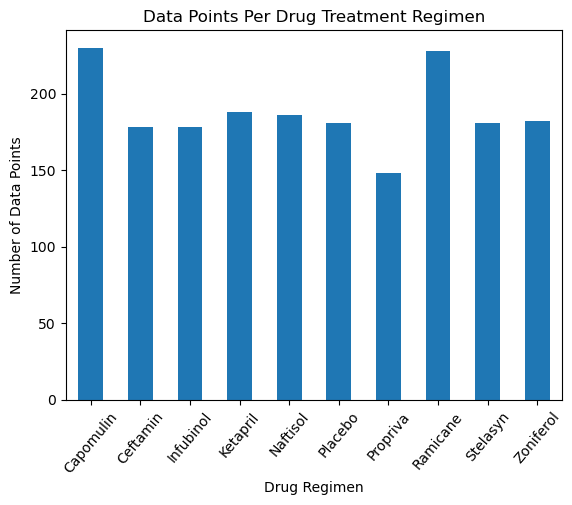

In [ ]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using Pandas.
datapoint2 = clean_combined_data.groupby('Drug Regimen').count()['Tumor Volume (mm3)']
forpanbar = pd.DataFrame(datapoint2)

also = forpanbar.plot.bar(legend=False,rot=50)
also
plt.ylabel("Number of Data Points")
plt.title("Data Points Per Drug Treatment Regimen")
plt.savefig('barplot1')

In [ ]:
import numpy as np
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using pyplot.
x_axis = np.arange(len(datapoint2))

tick_locations = [x for x in x_axis]
#for x in x_axis:
#tick_locations.append(x)

plt.figure(figsize=(5,3))
#plt.bar(x_axis, rain_df["Inches"], color='r', alpha=0.5, align="center")
#plt.xticks(tick_locations, rain_df["State"], rotation="vertical")


<Figure size 500x300 with 0 Axes>

<Figure size 500x300 with 0 Axes>

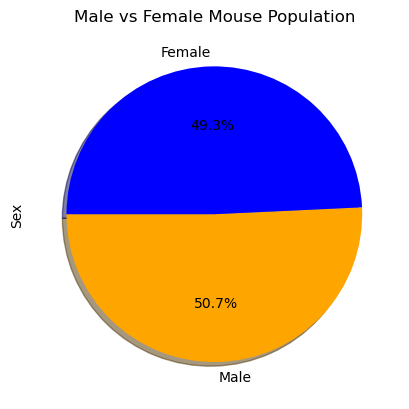

In [ ]:
# Assuming we want to plot the distribution of male and female mice
sex_data = clean_combined_data['Sex'].value_counts()
sizes = sex_data.values
newlist = sex_data.index

plt.pie(sizes, labels=newlist, colors=colors,
    autopct="%1.1f%%", shadow=True, startangle=180)
plt.title('Male vs Female Mouse Population')
plt.ylabel('Sex')

plt.savefig('piechart1')
plt.show()

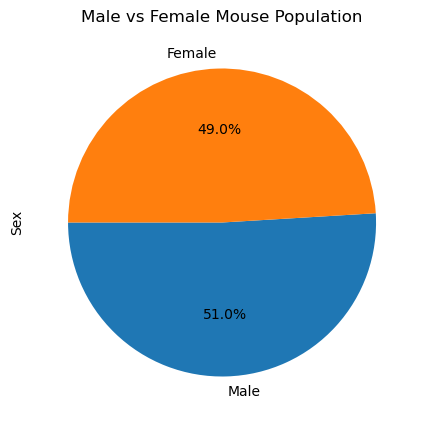

In [ ]:
# Define bygender
bygender = clean_combined_data['Sex'].value_counts()

# Generate a pie plot showing the distribution of female versus male mice using pyplot
secondpie = bygender.plot.pie(y='sizes', figsize=(5, 5), autopct="%1.1f%%",startangle=180)
plt.title('Male vs Female Mouse Population')
plt.ylabel('Sex')

plt.savefig('piechart2')
plt.show()

## Quartiles, Outliers and Boxplots

In [ ]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse
mouse_ids = list(clean_combined_data["Mouse ID"].unique())
max_times = []
for mouse in mouse_ids:
    maxidx = clean_combined_data.loc[clean_combined_data["Mouse ID"]==mouse,:]
    max_times.append(maxidx["Timepoint"].idxmax())
max_times = list(clean_combined_data.iloc[i,[1,2,7]] for i in max_times)
max_times = pd.DataFrame(data=max_times)
max_times.rename(columns={
    "Tumor Volume (mm3)":"Final Tumor Vol"
},inplace=True)
max_times

# Merge this group df with the original DataFrame to get the tumor volume at the last timepoint
# Assuming capolastmerge is a DataFrame derived from clean_combined_data


,Drug Regimen,Sex,Metastatic Sites
9,Ramicane,Male,1
19,Capomulin,Female,1
29,Capomulin,Female,0
39,Capomulin,Male,1
49,Ramicane,Male,1
...,...,...,...
1846,Stelasyn,Female,0
1849,Propriva,Female,0
1859,Infubinol,Female,3
1869,Naftisol,Female,3


In [ ]:
# Put treatments into a list for for loop (and later for plot labels)
treatment = ["Capomulin", "Ramicane", "Infubinol", "Ceftamin"]

# Create empty list to fill with tumor vol data (for plotting)
tumor_vol_data = []
upperq_list = []
lowerq_list = []

# Calculate the IQR and quantitatively determine if there are any potential outliers.
for drug in treatment:
    max_drug = max_times.loc[max_times["Drug Regimen"]==drug,:]
    quartiles = max_drug["Final Tumor Vol"].quantile([.25,.5,.75])
    lowerq = quartiles[0.25]
    upperq = quartiles[0.75]
    iqr = upperq-lowerq
    lower_bound = lowerq - (1.5*iqr)
    upper_bound = upperq + (1.5*iqr)
    print(f"The lower quartile of Final Tumor Vol for {drug} is: {lowerq}")
    print(f"The upper quartile of Final Tumor Vol for {drug} is: {upperq}")
    print(f"The interquartile range of Final Tumor Vol for {drug} is: {iqr}")
    print(f"The the median of Final Tumor Vol for {drug} is: {quartiles[0.5]} ")
    print(f"\nValues below {lower_bound} could be outliers.")
    print(f"Values above {upper_bound} could be outliers.")
    #list containing upper and lower quartiles of drug final tumor volume
    upperq_list.append(upperq)
    # Ensure that 'Final Tumor Vol' is a column in max_times DataFrame
    assert 'Final Tumor Vol' in max_times.columns, "Column 'Final Tumor Vol' is not in the DataFrame"
    tumor_vol_data.append(max_drug)


KeyError: 'Final Tumor Vol'

/var/folders/cy/68jk8wdj3hn29zqvtz90hgfh0000gn/T/ipykernel_13330/4278314680.py:5: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax1.set_xticklabels(treatment)


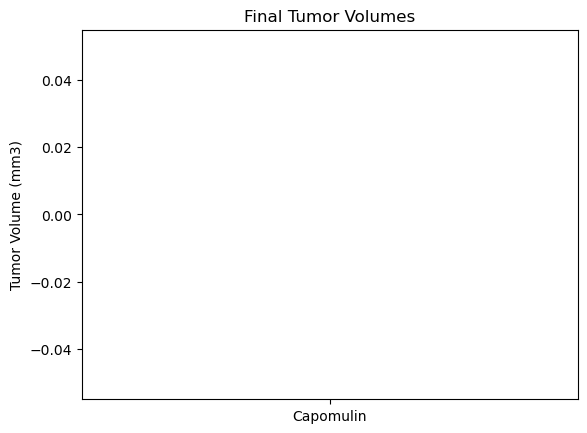

In [ ]:
# Generate a box plot that shows the distrubution of the tumor volume for each treatment group.
fig1, ax1 = plt.subplots()
ax1.set_title('Final Tumor Volumes')
ax1.set_ylabel('Tumor Volume (mm3)')
ax1.set_xticklabels(treatment)
outlier = dict(markerfacecolor='aqua')
bp = ax1.boxplot(tumor_vol_data, flierprops=outlier)
plt.show()

## Line and Scatter Plots

/var/folders/cy/68jk8wdj3hn29zqvtz90hgfh0000gn/T/ipykernel_13330/1078198479.py:2: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  capomulin_mouse = clean_combined_data.loc[clean_combined_data["Mouse ID"]==clean_combined_data.loc[clean_combined_data["Drug Regimen"]=="Capomulin",:].


IndexError: single positional indexer is out-of-bounds

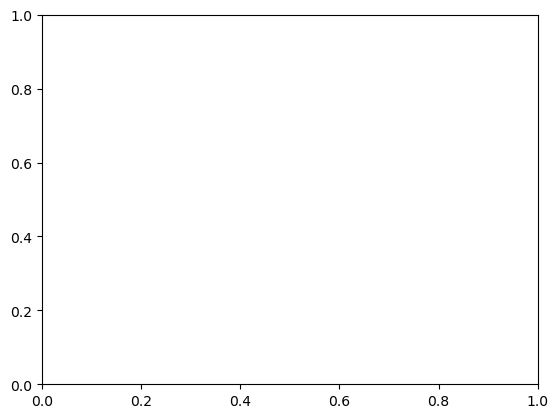

In [ ]:
# Generate a line plot of tumor volume vs. time point for a single mouse treated with Capomulin
capomulin_mouse = clean_combined_data.loc[clean_combined_data["Mouse ID"]==clean_combined_data.loc[clean_combined_data["Drug Regimen"]=="Capomulin",:].
iloc[0][1],:]
capo_vol = list(capomulin_mouse["Tumor Volume (mm3)"])
fig2, ax2 = plt.subplots()
ax2.set_title(f"{capomulin_mouse.iloc[0][1]}'s Tumor Vol Over Time")
ax2.set_ylabel('Tumor Volume (mm3)')
ax2.set_xlabel('Timepoint')
ax2.plot(capomulin_mouse["Timepoint"],capomulin_mouse["Tumor Volume (mm3)"],color="blue")
plt.show()

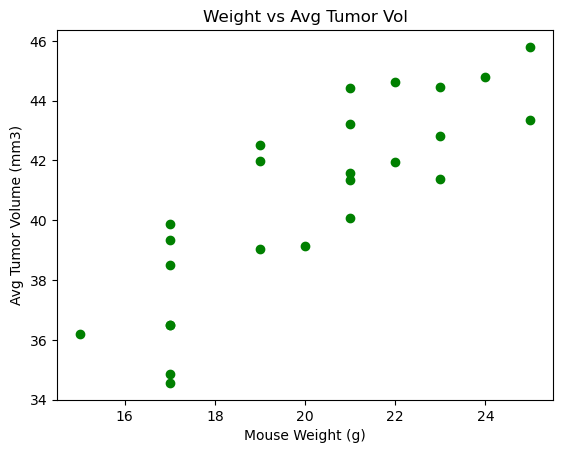

In [10]:
# Generate a scatter plot of mouse weight vs. the average observed tumor volume for the entire Capomulin regimen
capo_regime = clean_combined_data.loc[clean_combined_data["Drug Regimen"]=="Capomulin",:].groupby("Mouse ID")[["Weight (g)","Tumor Volume (mm3)"]].mean()
plt.scatter(capo_regime["Weight (g)"],capo_regime["Tumor Volume (mm3)"],color="g")
plt.title("Weight vs Avg Tumor Vol")
plt.xlabel("Mouse Weight (g)")
plt.ylabel("Avg Tumor Volume (mm3)")
plt.show()

## Correlation and Regression

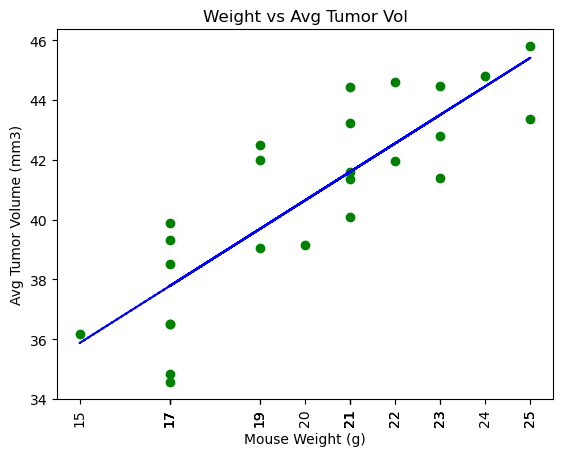

In [11]:
# Calculate the correlation coefficient and a linear regression model 
# for mouse weight and average observed tumor volume for the entire Capomulin regimen
capo_slope, capo_int, capo_r, capo_p, capo_std_err = st.linregress(capo_regime["Weight (g)"],capo_regime["Tumor Volume (mm3)"])
capo_fit = capo_slope * capo_regime["Weight (g)"] + capo_int
plt.scatter(capo_regime["Weight (g)"],capo_regime["Tumor Volume (mm3)"],color="g")
plt.plot(capo_regime["Weight (g)"],capo_fit,"--",color="b")
plt.xticks(capo_regime["Weight (g)"], rotation=90)
plt.title("Weight vs Avg Tumor Vol")
plt.xlabel("Mouse Weight (g)")
plt.ylabel("Avg Tumor Volume (mm3)")
plt.show()